# Billboard Hot 100 and Unemployment Rate Analysis

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
import seaborn as sns

## Load Music Data

In [14]:
bil = pd.read_pickle('/Users/kohtaasakura/PyDev/grad_thesis/billboard/billboard_weekly.pkl')
bil['uri'] = 'spotify:track:' + bil['song_id']
bil

,date,song,artist,song_id,uri
0,2021-11-06,Easy On Me,Adele,0gplL1WMoJ6iYaPgMCL0gX,spotify:track:0gplL1WMoJ6iYaPgMCL0gX
1,2021-11-06,Stay,The Kid LAROI & Justin Bieber,5HCyWlXZPP0y6Gqq8TgA20,spotify:track:5HCyWlXZPP0y6Gqq8TgA20
2,2021-11-06,Industry Baby,Lil Nas X & Jack Harlow,27NovPIUIRrOZoCHxABJwK,spotify:track:27NovPIUIRrOZoCHxABJwK
3,2021-11-06,Fancy Like,Walker Hayes,58UKC45GPNTflCN6nwCUeF,spotify:track:58UKC45GPNTflCN6nwCUeF
4,2021-11-06,Bad Habits,Ed Sheeran,3rmo8F54jFF8OgYsqTxm5d,spotify:track:3rmo8F54jFF8OgYsqTxm5d
...,...,...,...,...,...
254882,1973-01-06,The Red Back Spider,Brownsville Station,6UGHk2cmbDC1oidVjXcCKo,spotify:track:6UGHk2cmbDC1oidVjXcCKo
254883,1973-01-06,She's Got To Be A Saint,Ray Price,0md3dDLRwrsgBQ59CfgmXO,spotify:track:0md3dDLRwrsgBQ59CfgmXO
254884,1973-01-06,Soul Song,Joe Stampley,5r9h2NUZTuQD3mvZXfMGmU,spotify:track:5r9h2NUZTuQD3mvZXfMGmU
254885,1973-01-06,On And Off (Part 1),Anacostia,37Edt4Ro7v2STgu75Fj35o,spotify:track:37Edt4Ro7v2STgu75Fj35o


In [15]:
audio = pd.read_pickle('/Users/kohtaasakura/PyDev/grad_thesis/spotify_data/billboard_audio_features.pkl')
audio = audio.drop_duplicates()

In [16]:
merged = pd.merge(bil, audio, how='left', on='uri')
merged = merged[('1975-01-01' <= merged['date']) & (merged['date'] < '2021-11-01')]
merged.head()

,date,song,artist,song_id,uri,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
100,2021-10-30,Easy On Me,Adele,0gplL1WMoJ6iYaPgMCL0gX,spotify:track:0gplL1WMoJ6iYaPgMCL0gX,0.5780,0.604,224695.0,0.366,0.000000,5.0,0.1330,-7.519,1.0,0.0282,141.981,4.0,0.130
101,2021-10-30,Stay,The Kid LAROI & Justin Bieber,5HCyWlXZPP0y6Gqq8TgA20,spotify:track:5HCyWlXZPP0y6Gqq8TgA20,0.0383,0.591,141806.0,0.764,0.000000,1.0,0.1030,-5.484,1.0,0.0483,169.928,4.0,0.478
102,2021-10-30,Industry Baby,Lil Nas X & Jack Harlow,27NovPIUIRrOZoCHxABJwK,spotify:track:27NovPIUIRrOZoCHxABJwK,0.0203,0.736,212000.0,0.704,0.000000,3.0,0.0501,-7.409,0.0,0.0615,149.995,4.0,0.894
103,2021-10-30,Fancy Like,Walker Hayes,58UKC45GPNTflCN6nwCUeF,spotify:track:58UKC45GPNTflCN6nwCUeF,0.1110,0.647,161853.0,0.765,0.000000,1.0,0.3150,-6.459,1.0,0.0600,79.994,4.0,0.855
104,2021-10-30,Bad Habits,Ed Sheeran,3rmo8F54jFF8OgYsqTxm5d,spotify:track:3rmo8F54jFF8OgYsqTxm5d,0.0451,0.807,230747.0,0.893,0.000028,11.0,0.3660,-3.745,0.0,0.0347,126.011,4.0,0.537


In [17]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244387 entries, 100 to 244486
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   date              244387 non-null  object 
 1   song              244387 non-null  object 
 2   artist            244387 non-null  object 
 3   song_id           244387 non-null  object 
 4   uri               244387 non-null  object 
 5   acousticness      244367 non-null  float64
 6   danceability      244367 non-null  float64
 7   duration_ms       244367 non-null  float64
 8   energy            244367 non-null  float64
 9   instrumentalness  244367 non-null  float64
 10  key               244367 non-null  float64
 11  liveness          244367 non-null  float64
 12  loudness          244367 non-null  float64
 13  mode              244367 non-null  float64
 14  speechiness       244367 non-null  float64
 15  tempo             244367 non-null  float64
 16  time_signature    

In [18]:
merged.dropna(inplace=True)
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244367 entries, 100 to 244486
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   date              244367 non-null  object 
 1   song              244367 non-null  object 
 2   artist            244367 non-null  object 
 3   song_id           244367 non-null  object 
 4   uri               244367 non-null  object 
 5   acousticness      244367 non-null  float64
 6   danceability      244367 non-null  float64
 7   duration_ms       244367 non-null  float64
 8   energy            244367 non-null  float64
 9   instrumentalness  244367 non-null  float64
 10  key               244367 non-null  float64
 11  liveness          244367 non-null  float64
 12  loudness          244367 non-null  float64
 13  mode              244367 non-null  float64
 14  speechiness       244367 non-null  float64
 15  tempo             244367 non-null  float64
 16  time_signature    

In [19]:
merged.describe()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
count,244367.000000,244367.000000,2.443670e+05,244367.000000,244367.000000,244367.000000,244367.000000,244367.000000,244367.000000,244367.000000,244367.000000,244367.000000,244367.000000
mean,0.193797,0.638081,2.429308e+05,0.656911,0.027862,5.282546,0.179487,-7.828741,0.678283,0.080428,120.317935,3.968715,0.576033
std,0.223176,0.145249,5.674325e+04,0.185792,0.127591,3.593303,0.150537,3.507210,0.467136,0.088100,27.608631,0.244480,0.236590
min,0.000002,0.058600,2.968800e+04,0.002360,0.000000,0.000000,0.014600,-42.391000,0.000000,0.022000,36.998000,1.000000,0.000010
25%,0.026100,0.546000,2.088640e+05,0.528000,0.000000,2.000000,0.086600,-9.834000,0.000000,0.032800,99.060000,4.000000,0.388000
50%,0.102000,0.646000,2.357670e+05,0.677000,0.000003,5.000000,0.122000,-7.087000,1.000000,0.044100,119.123000,4.000000,0.589000
75%,0.288000,0.741000,2.686130e+05,0.804000,0.000326,8.000000,0.229000,-5.254000,1.000000,0.079400,136.071000,4.000000,0.770000
max,0.996000,0.988000,1.367093e+06,0.998000,0.986000,11.000000,0.997000,2.291000,1.000000,0.951000,218.179000,5.000000,0.991000


In [20]:
audio_data = merged.drop(columns=['date', 'song', 'artist', 'song_id', 'uri'])

## Distribution of Each Audio Feature

Text(0.5, 1.0, 'Valence')

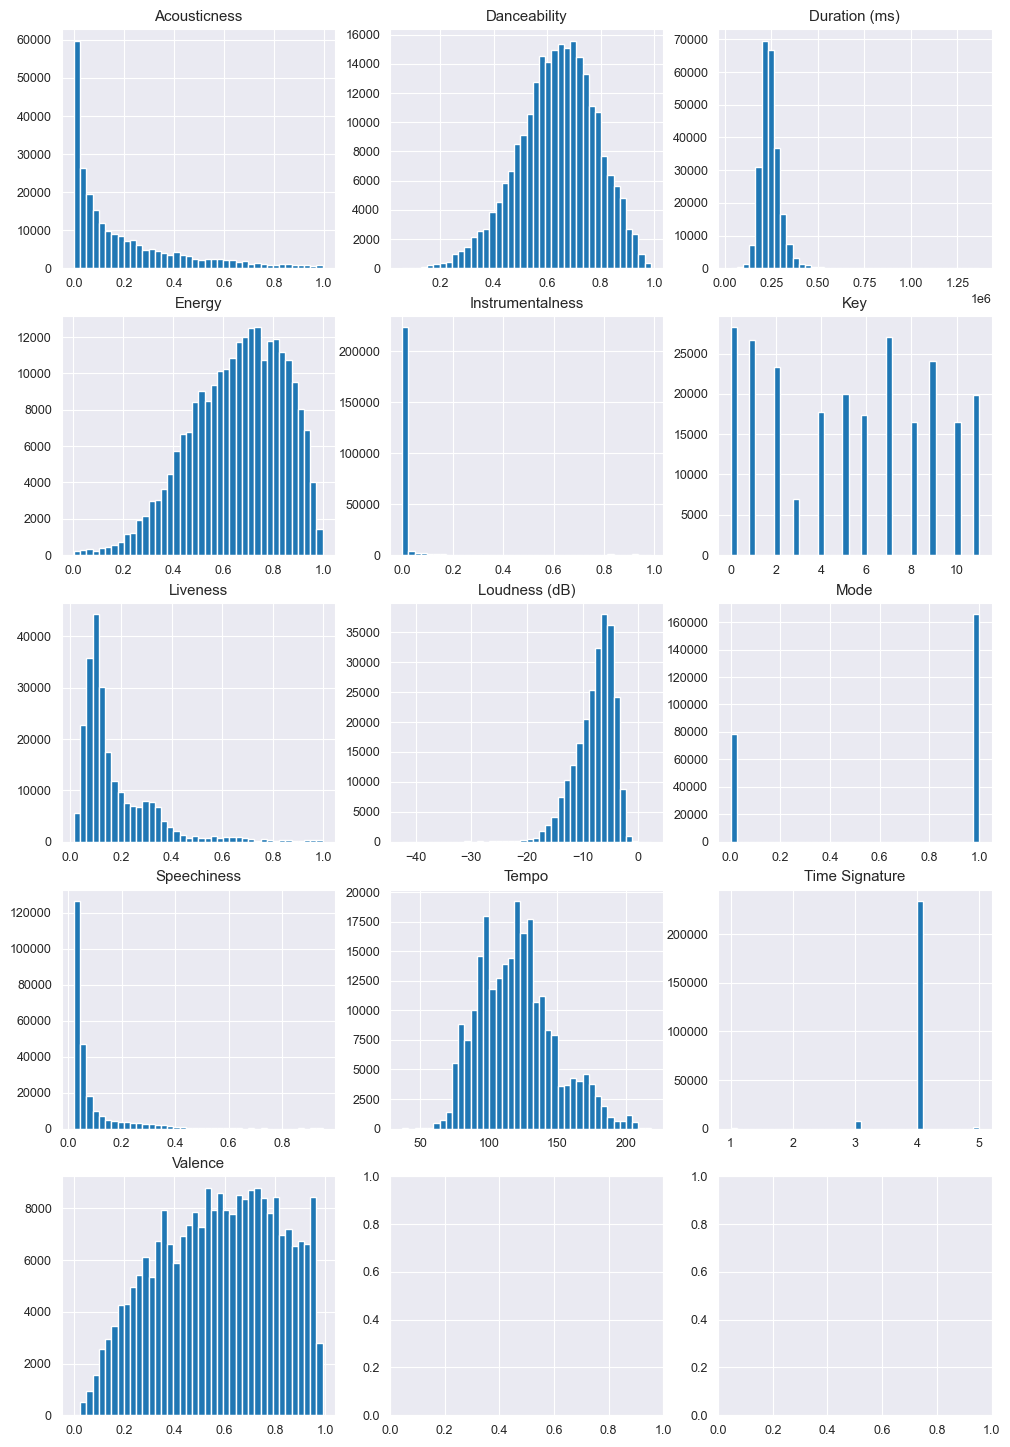

In [104]:
plt.rcParams['font.size'] = 9
fig, ax = plt.subplots(5, 3, figsize=(12, 18))

# audio_data.hist(ax=ax, bins=35)
ax[0, 0].hist(audio_data['acousticness'], bins=40)
ax[0, 0].set_title('Acousticness')

ax[0, 1].hist(audio_data['danceability'], bins=40)
ax[0, 1].set_title('Danceability')

ax[0, 2].hist(audio_data['duration_ms'], bins=40)
ax[0, 2].set_title('Duration (ms)')

ax[1, 0].hist(audio_data['energy'], bins=40)
ax[1, 0].set_title('Energy')

ax[1, 1].hist(audio_data['instrumentalness'], bins=40)
ax[1, 1].set_title('Instrumentalness')

ax[1, 2].hist(audio_data['key'], bins=40)
ax[1, 2].set_title('Key')

ax[2, 0].hist(audio_data['liveness'], bins=40)
ax[2, 0].set_title('Liveness')

ax[2, 1].hist(audio_data['loudness'], bins=40)
ax[2, 1].set_title('Loudness (dB)')

ax[2, 2].hist(audio_data['mode'], bins=40)
ax[2, 2].set_title('Mode')

ax[3, 0].hist(audio_data['speechiness'], bins=40)
ax[3, 0].set_title('Speechiness')

ax[3, 1].hist(audio_data['tempo'], bins=40)
ax[3, 1].set_title('Tempo')

ax[3, 2].hist(audio_data['time_signature'], bins=40)
ax[3, 2].set_title('Time Signature')

ax[4, 0].hist(audio_data['valence'], bins=40)
ax[4, 0].set_title('Valence')

In [42]:
merged['date'] = pd.to_datetime(merged['date'])
merged['month'] = merged['date'].dt.strftime('%Y-%m')
merged['month'] = pd.to_datetime(merged['month'])
monthly_df = merged.groupby('month').mean()
monthly_df = monthly_df.reset_index()
# monthly_df = monthly_df[('1975-01-01' <= monthly_df['month']) & (monthly_df['month'] <= '2021-10-01')]
monthly_df

/var/folders/bk/syp6nsbn40j6khhtbc03r73c0000gn/T/ipykernel_52035/622726499.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  monthly_df = merged.groupby('month').mean()


,month,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,1975-01-01,0.358626,0.591538,224563.8050,0.579553,0.064224,5.0625,0.197377,-10.259368,0.8125,0.052111,115.325083,3.9575,0.672567
1,1975-02-01,0.368940,0.588253,220808.0600,0.588122,0.050941,5.4350,0.181158,-10.012720,0.8600,0.050159,115.271552,3.9500,0.665122
2,1975-03-01,0.334843,0.590070,229350.4920,0.581048,0.054995,5.8280,0.184357,-10.316240,0.8400,0.050184,114.686858,3.9220,0.664684
3,1975-04-01,0.338728,0.580120,236438.6350,0.551515,0.069511,6.1125,0.158960,-10.934342,0.7850,0.052581,117.653617,3.9000,0.653632
4,1975-05-01,0.337907,0.571930,234010.9940,0.587851,0.076120,5.7140,0.163500,-10.626060,0.7500,0.057598,121.127004,3.9060,0.668920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
557,2021-06-01,0.236636,0.663382,192765.3875,0.604500,0.000449,5.2550,0.179318,-6.803228,0.6750,0.142282,122.396225,3.9575,0.464047
558,2021-07-01,0.217580,0.651402,193346.3260,0.635346,0.002264,5.2460,0.193207,-6.248534,0.6860,0.114297,123.421260,3.9820,0.499031
559,2021-08-01,0.210171,0.657075,193621.0700,0.642460,0.006846,5.3675,0.180522,-6.190460,0.6825,0.110391,124.751413,3.9675,0.523641
560,2021-09-01,0.213370,0.642172,205435.6775,0.638335,0.002790,5.3075,0.183702,-6.215815,0.7025,0.122931,124.047017,3.9625,0.495950


In [49]:
unemp = pd.read_csv('/Users/kohtaasakura/PyDev/grad_thesis/economic_indicators/unemployment_rate.csv')
unemp['DATE'] = pd.to_datetime(unemp['DATE'])
unemp = unemp[('1975-01-01' <= unemp['DATE']) & (unemp['DATE'] <= '2021-10-01')]
unemp

,DATE,UNRATE
324,1975-01-01,8.1
325,1975-02-01,8.1
326,1975-03-01,8.6
327,1975-04-01,8.8
328,1975-05-01,9.0
...,...,...
881,2021-06-01,5.9
882,2021-07-01,5.4
883,2021-08-01,5.2
884,2021-09-01,4.8


## Audio Features and Unemplyoyment Rate Over Time

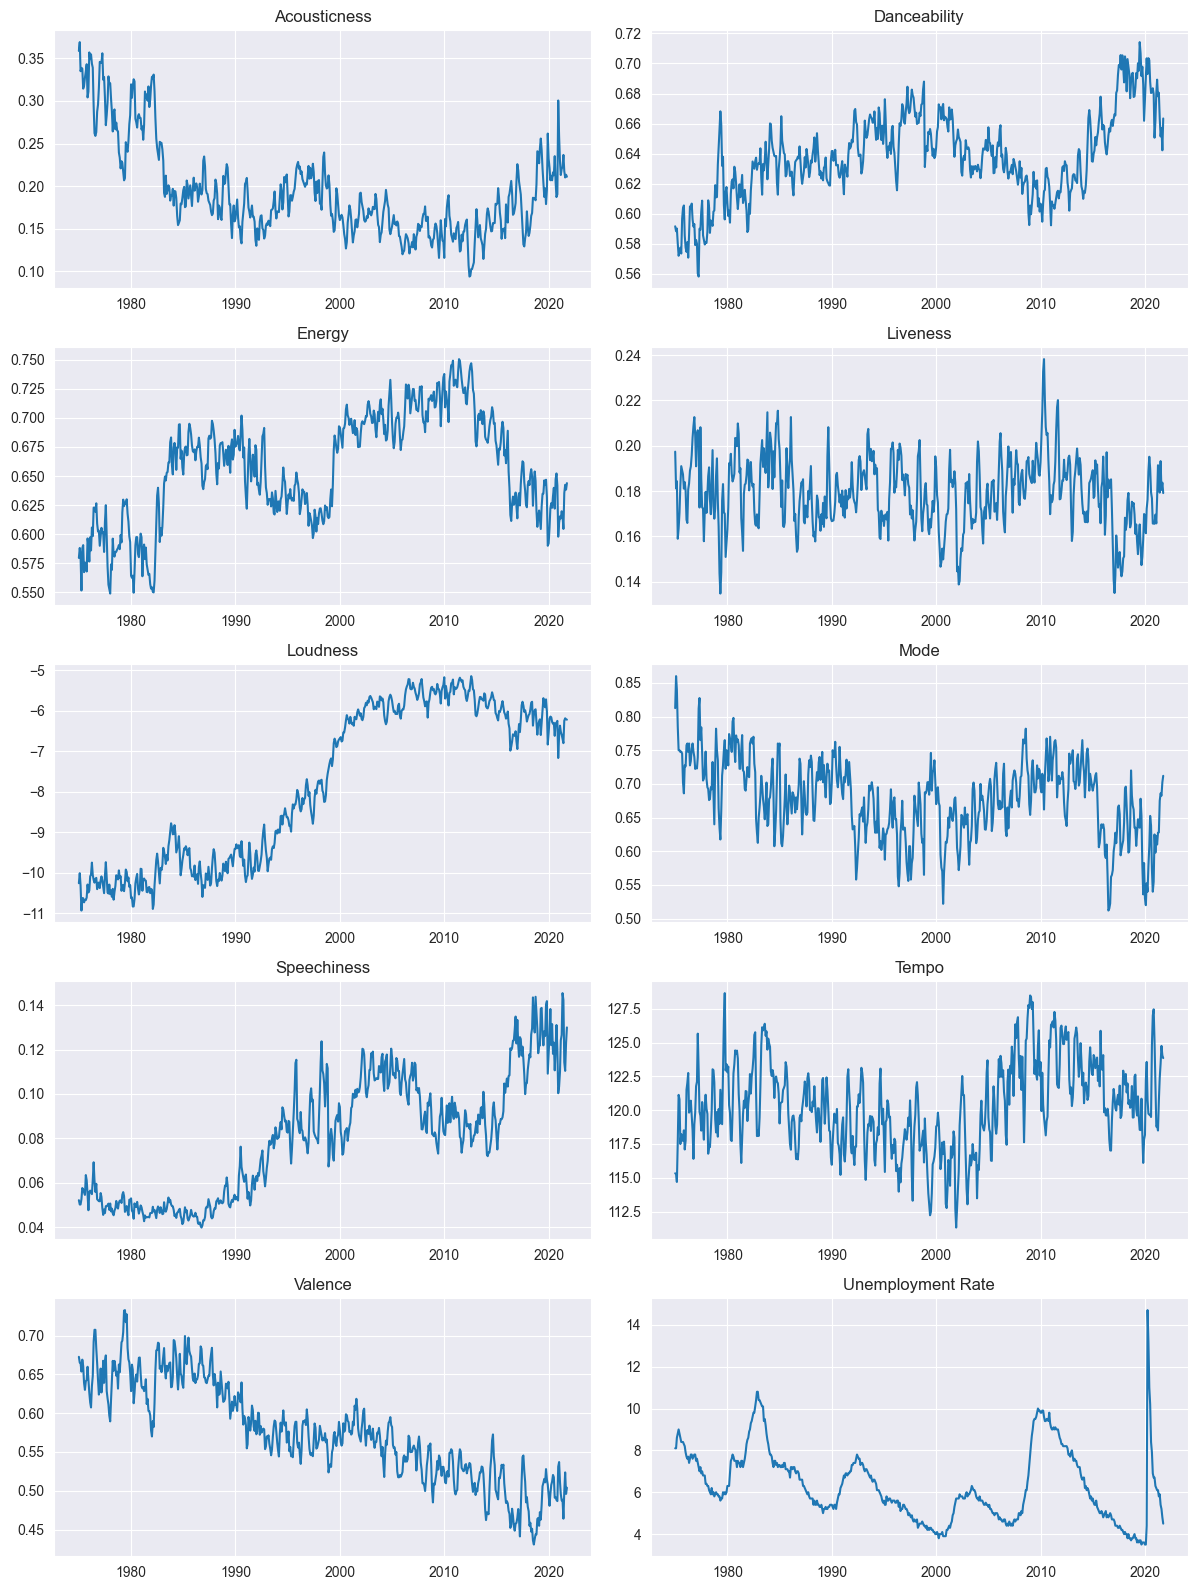

In [50]:
plt.rcParams['font.size'] = 10
fig = plt.figure(figsize=[12, 16])

ax1 = fig.add_subplot(5, 2, 1)
ax2 = fig.add_subplot(5, 2, 2)
ax3 = fig.add_subplot(5, 2, 3)
ax4= fig.add_subplot(5, 2, 4)
ax5 = fig.add_subplot(5, 2, 5)
ax6 = fig.add_subplot(5, 2, 6)
ax7 = fig.add_subplot(5, 2, 7)
ax8 = fig.add_subplot(5, 2, 8)
ax9 = fig.add_subplot(5, 2, 9)
ax10 = fig.add_subplot(5, 2, 10)

x = monthly_df['month']

y1 = monthly_df['acousticness']
y2 = monthly_df['danceability']
y3 = monthly_df['energy']
y4 = monthly_df['liveness']
y5 = monthly_df['loudness']
y6 = monthly_df['mode']
y7 = monthly_df['speechiness']
y8 = monthly_df['tempo']
y9 = monthly_df['valence']
y10 = unemp['UNRATE']

ax1.plot(x, y1)
ax2.plot(x, y2)
ax3.plot(x, y3)
ax4.plot(x, y4)
ax5.plot(x, y5)
ax6.plot(x, y6)
ax7.plot(x, y7)
ax8.plot(x, y8)
ax9.plot(x, y9)
ax10.plot(x, y10)


ax1.set_title('Acousticness')
ax2.set_title('Danceability')
ax3.set_title('Energy')
ax4.set_title('Liveness')
ax5.set_title('Loudness')
ax6.set_title('Mode')
ax7.set_title('Speechiness')
ax8.set_title('Tempo')
ax9.set_title('Valence')
ax10.set_title('Unemployment Rate')


fig.tight_layout()
plt.show()

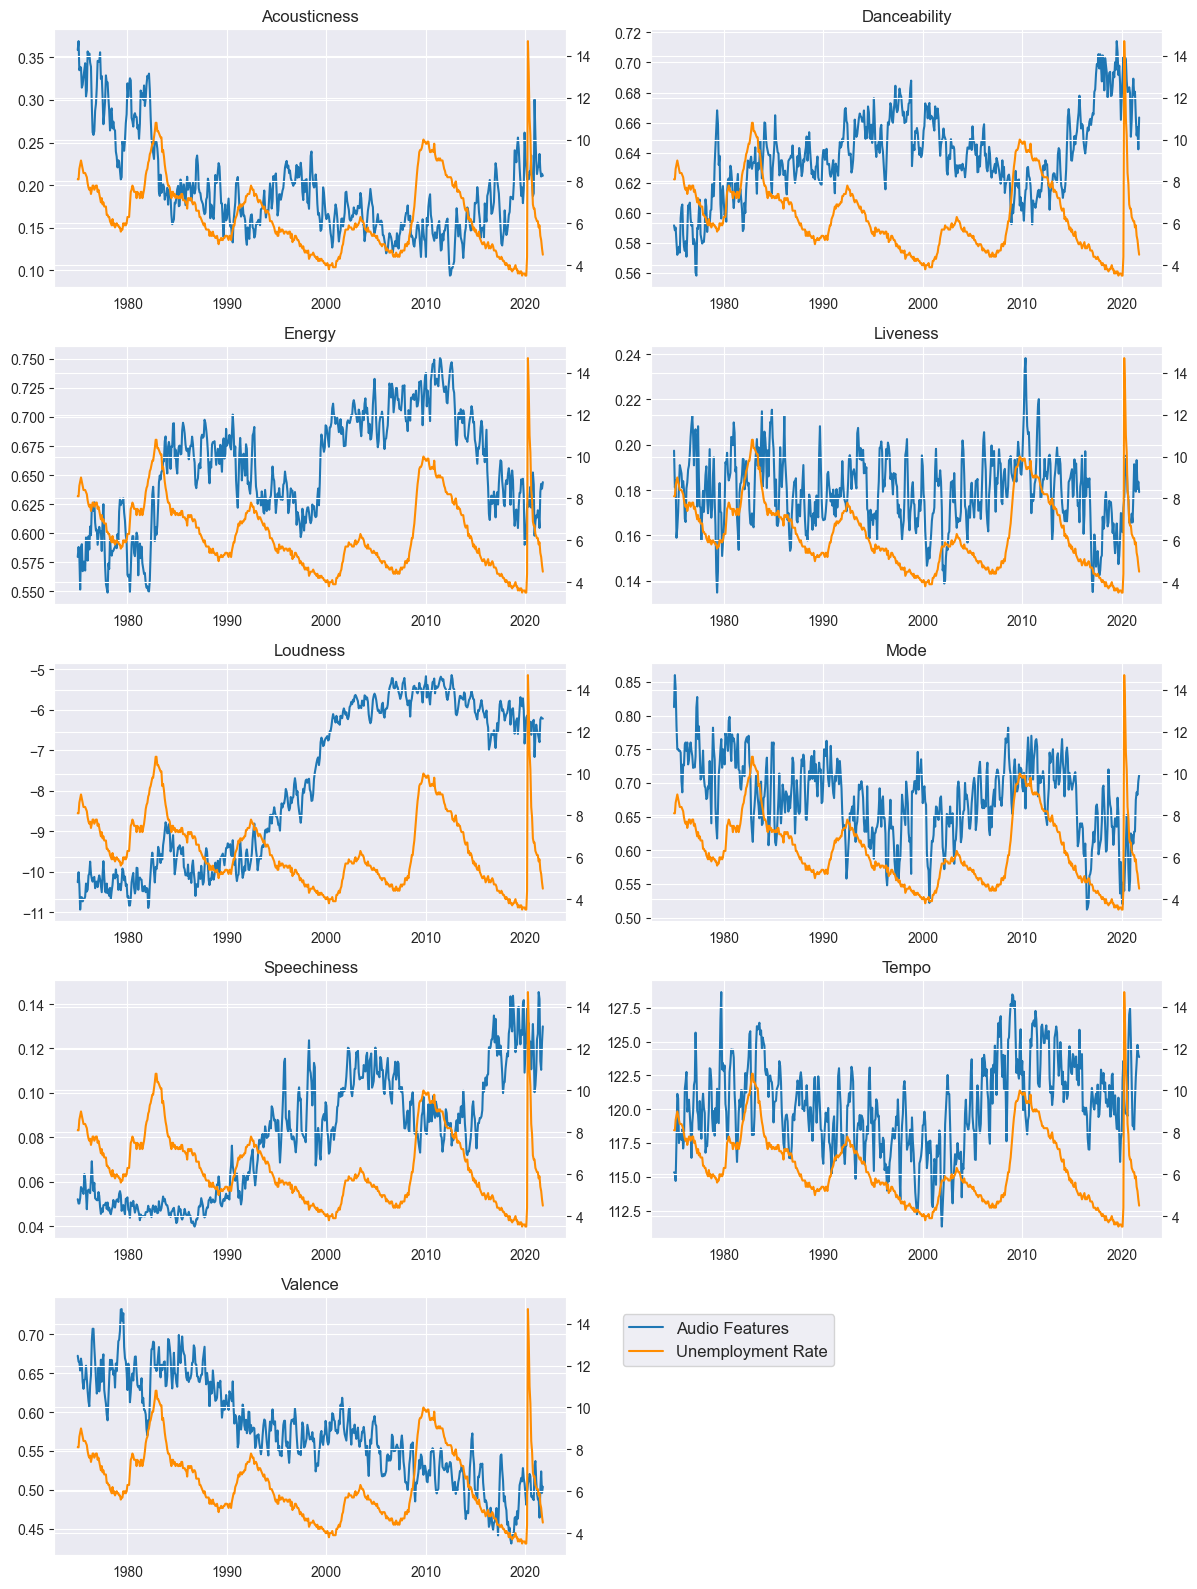

In [83]:
plt.rcParams['font.size'] = 10
fig = plt.figure(figsize=[12, 16])

ax1 = fig.add_subplot(5, 2, 1)
ax2 = fig.add_subplot(5, 2, 2)
ax3 = fig.add_subplot(5, 2, 3)
ax4 = fig.add_subplot(5, 2, 4)
ax5 = fig.add_subplot(5, 2, 5)
ax6 = fig.add_subplot(5, 2, 6)
ax7 = fig.add_subplot(5, 2, 7)
ax8 = fig.add_subplot(5, 2, 8)
ax9 = fig.add_subplot(5, 2, 9)

x = monthly_df['month']

y1 = monthly_df['acousticness']
y2 = monthly_df['danceability']
y3 = monthly_df['energy']
y4 = monthly_df['liveness']
y5 = monthly_df['loudness']
y6 = monthly_df['mode']
y7 = monthly_df['speechiness']
y8 = monthly_df['tempo']
y9 = monthly_df['valence']

ax1.plot(x, y1, label='Audio Features')
ax2.plot(x, y2)
ax3.plot(x, y3)
ax4.plot(x, y4)
ax5.plot(x, y5)
ax6.plot(x, y6)
ax7.plot(x, y7)
ax8.plot(x, y8)
ax9.plot(x, y9)

ax1_1 = ax1.twinx()
ax2_1 = ax2.twinx()
ax3_1 = ax3.twinx()
ax4_1 = ax4.twinx()
ax5_1 = ax5.twinx()
ax6_1 = ax6.twinx()
ax7_1 = ax7.twinx()
ax8_1 = ax8.twinx()
ax9_1 = ax9.twinx()

z = unemp['UNRATE']

ax1_1.plot(x, z, color='darkorange', label='Unemployment Rate')
ax2_1.plot(x, z, color='darkorange')
ax3_1.plot(x, z, color='darkorange')
ax4_1.plot(x, z, color='darkorange')
ax5_1.plot(x, z, color='darkorange')
ax6_1.plot(x, z, color='darkorange')
ax7_1.plot(x, z, color='darkorange')
ax8_1.plot(x, z, color='darkorange')
ax9_1.plot(x, z, color='darkorange')

ax1.set_title('Acousticness')
ax2.set_title('Danceability')
ax3.set_title('Energy')
ax4.set_title('Liveness')
ax5.set_title('Loudness')
ax6.set_title('Mode')
ax7.set_title('Speechiness')
ax8.set_title('Tempo')
ax9.set_title('Valence')

fig.legend(bbox_to_anchor=(0.7, 0.18))
fig.tight_layout()
plt.show()

## Correlation Matrix

/var/folders/bk/syp6nsbn40j6khhtbc03r73c0000gn/T/ipykernel_52035/2141743542.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = monthly_df.drop(columns=['duration_ms', 'instrumentalness', 'key', 'time_signature']).corr()


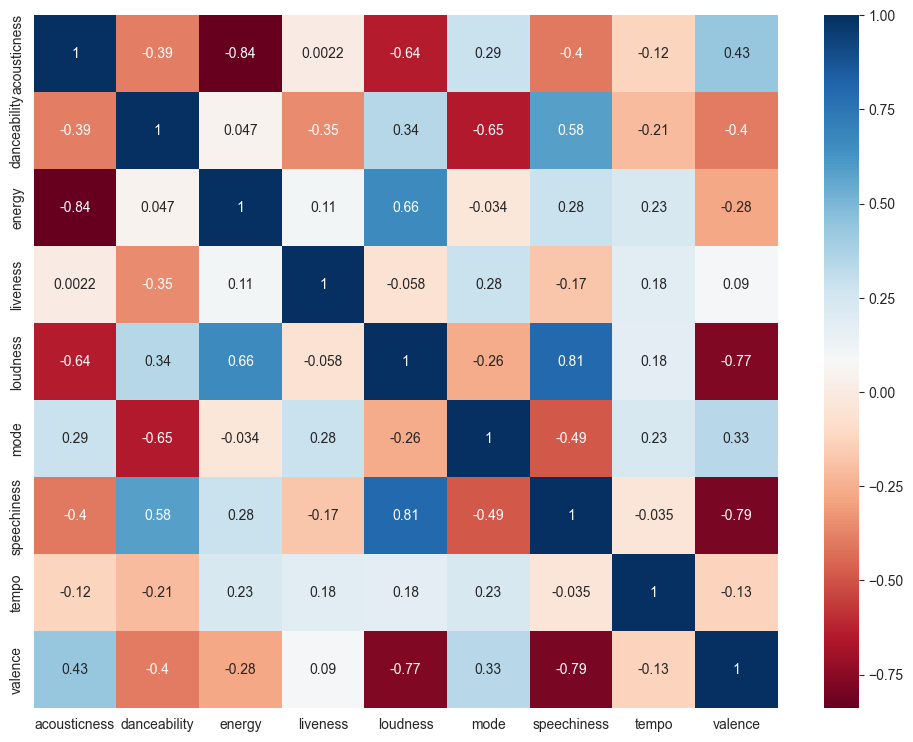

In [86]:
corr = monthly_df.drop(columns=['duration_ms', 'instrumentalness', 'key', 'time_signature']).corr()
plt.figure(figsize=(12,9))
sns.heatmap(corr, cmap="RdBu",annot=True)
plt.show()

## ADF Test

In [87]:
adf_df = monthly_df.drop(columns=['month', 'duration_ms', 'instrumentalness', 'key', 'time_signature'])

for col in adf_df.columns:
    adf_test = adfuller(monthly_df[col])

    print(col)
    print('ADF Statistic: %f' % adf_test[0])
    print('p-value: %f' % adf_test[1])
    print('Critical values :')
    for k, v in adf_test[4].items():
        print('\t', k, v)

acousticness
ADF Statistic: -3.061751
p-value: 0.029516
Critical values :
	 1% -3.4423174665535385
	 5% -2.866818952732754
	 10% -2.569581505602171
danceability
ADF Statistic: -2.143659
p-value: 0.227325
Critical values :
	 1% -3.442273822587951
	 5% -2.8667997388278583
	 10% -2.5695712667942465
energy
ADF Statistic: -2.381061
p-value: 0.147153
Critical values :
	 1% -3.44218748274498
	 5% -2.8667617276005006
	 10% -2.569551011281552
liveness
ADF Statistic: -8.541763
p-value: 0.000000
Critical values :
	 1% -3.442081300525009
	 5% -2.8667149792729596
	 10% -2.569526100127551
loudness
ADF Statistic: -1.225941
p-value: 0.662338
Critical values :
	 1% -3.4422089502693454
	 5% -2.866771178805824
	 10% -2.5695560476482164
mode
ADF Statistic: -4.425499
p-value: 0.000267
Critical values :
	 1% -3.4421660928041633
	 5% -2.8667523104859627
	 10% -2.56954599309042
speechiness
ADF Statistic: -0.693923
p-value: 0.848317
Critical values :
	 1% -3.442273822587951
	 5% -2.8667997388278583
	 10% -2.56

In [88]:
adf_test = adfuller(unemp.UNRATE)

print(col)
print('ADF Statistic: %f' % adf_test[0])
print('p-value: %f' % adf_test[1])
print('Critical values :')
for k, v in adf_test[4].items():
    print('\t', k, v)

valence
ADF Statistic: -3.327165
p-value: 0.013707
Critical values :
	 1% -3.442102384299813
	 5% -2.8667242618524233
	 10% -2.569531046591633


# Linear Regressions for The Stationary Variables

In [90]:
x = unemp['UNRATE']
x = sm.add_constant(x)
y = monthly_df[['acousticness']]
y = y.values.reshape(-1, 1)

model = sm.OLS(y, x).fit()
model_resid = model.resid
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.041
Model:                            OLS   Adj. R-squared:                  0.040
Method:                 Least Squares   F-statistic:                     24.18
Date:                Mon, 30 Jan 2023   Prob (F-statistic):           1.16e-06
Time:                        16:03:04   Log-Likelihood:                 844.36
No. Observations:                 562   AIC:                            -1685.
Df Residuals:                     560   BIC:                            -1676.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1525      0.009     17.531      0.0

In [91]:
x = unemp['UNRATE']
x = sm.add_constant(x)
y = monthly_df[['liveness']]
y = y.values.reshape(-1,1)

model = sm.OLS(y, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.163
Model:                            OLS   Adj. R-squared:                  0.161
Method:                 Least Squares   F-statistic:                     108.9
Date:                Mon, 30 Jan 2023   Prob (F-statistic):           2.02e-23
Time:                        16:03:14   Log-Likelihood:                 1599.5
No. Observations:                 562   AIC:                            -3195.
Df Residuals:                     560   BIC:                            -3186.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1566      0.002     68.987      0.0

In [92]:
x = unemp['UNRATE']
x = sm.add_constant(x)
y = monthly_df[['mode']]
y = y.values.reshape(-1,1)

model = sm.OLS(y, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.110
Model:                            OLS   Adj. R-squared:                  0.108
Method:                 Least Squares   F-statistic:                     69.07
Date:                Mon, 30 Jan 2023   Prob (F-statistic):           7.21e-16
Time:                        16:03:35   Log-Likelihood:                 847.62
No. Observations:                 562   AIC:                            -1691.
Df Residuals:                     560   BIC:                            -1683.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6089      0.009     70.386      0.0

In [93]:
x = unemp['UNRATE']
x = sm.add_constant(x)
y = monthly_df[['tempo']]
y = y.values.reshape(-1,1)

model = sm.OLS(y, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.097
Model:                            OLS   Adj. R-squared:                  0.096
Method:                 Least Squares   F-statistic:                     60.42
Date:                Mon, 30 Jan 2023   Prob (F-statistic):           3.70e-14
Time:                        16:03:40   Log-Likelihood:                -1421.6
No. Observations:                 562   AIC:                             2847.
Df Residuals:                     560   BIC:                             2856.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        116.6383      0.490    237.804      0.0

## Linear Regressions for The Non-Stationary Varibles

In [94]:
unemp['trend'] = [i for i in range(len(unemp))]
unemp

,DATE,UNRATE,trend
324,1975-01-01,8.1,0
325,1975-02-01,8.1,1
326,1975-03-01,8.6,2
327,1975-04-01,8.8,3
328,1975-05-01,9.0,4
...,...,...,...
881,2021-06-01,5.9,557
882,2021-07-01,5.4,558
883,2021-08-01,5.2,559
884,2021-09-01,4.8,560


In [95]:
x = unemp[['UNRATE', 'trend']]
x = sm.add_constant(x)
y = monthly_df['danceability']
y = y.values.reshape(-1, 1)

model = sm.OLS(y, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.410
Model:                            OLS   Adj. R-squared:                  0.408
Method:                 Least Squares   F-statistic:                     193.9
Date:                Mon, 30 Jan 2023   Prob (F-statistic):           1.06e-64
Time:                        16:04:18   Log-Likelihood:                 1363.0
No. Observations:                 562   AIC:                            -2720.
Df Residuals:                     559   BIC:                            -2707.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6560      0.004    150.144      0.0

In [96]:
x = unemp[['UNRATE', 'trend']]
x = sm.add_constant(x)
y = monthly_df['energy']
y = y.values.reshape(-1, 1)

model = sm.OLS(y, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.259
Model:                            OLS   Adj. R-squared:                  0.256
Method:                 Least Squares   F-statistic:                     97.50
Date:                Mon, 30 Jan 2023   Prob (F-statistic):           4.73e-37
Time:                        16:04:58   Log-Likelihood:                 1014.7
No. Observations:                 562   AIC:                            -2023.
Df Residuals:                     559   BIC:                            -2010.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5895      0.008     72.588      0.0

In [97]:
x = unemp[['UNRATE', 'trend']]
x = sm.add_constant(x)
y = monthly_df['loudness']
y = y.values.reshape(-1, 1)

model = sm.OLS(y, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     1209.
Date:                Mon, 30 Jan 2023   Prob (F-statistic):          9.68e-204
Time:                        16:05:20   Log-Likelihood:                -697.27
No. Observations:                 562   AIC:                             1401.
Df Residuals:                     559   BIC:                             1414.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -10.9947      0.171    -64.361      0.0

In [98]:
x = unemp[['UNRATE', 'trend']]
x = sm.add_constant(x)
y = monthly_df['speechiness']
y = y.values.reshape(-1, 1)

model = sm.OLS(y, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     880.1
Date:                Mon, 30 Jan 2023   Prob (F-statistic):          1.94e-173
Time:                        16:06:19   Log-Likelihood:                 1629.4
No. Observations:                 562   AIC:                            -3253.
Df Residuals:                     559   BIC:                            -3240.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0643      0.003     23.647      0.0

In [99]:
x = unemp[['UNRATE', 'trend']]
x = sm.add_constant(x)
y = monthly_df['valence']
y = y.values.reshape(-1, 1)

model = sm.OLS(y, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     1188.
Date:                Mon, 30 Jan 2023   Prob (F-statistic):          4.79e-202
Time:                        16:06:34   Log-Likelihood:                 1221.2
No. Observations:                 562   AIC:                            -2436.
Df Residuals:                     559   BIC:                            -2423.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6661      0.006    118.439      0.0